## Data Science Programmentwurf am Beispieldatensatz mit Fahrzeugen

#### Kurs: Data Science (Wahlfach)
#### Abgabetermin: 18.04.2019
#### Gruppe: David Marchi & Yunus Emre Besogul

In [30]:
# All imports here...

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

In [144]:
# 1. mpg (miles per gallon):           continuous
# 2. cylinders:     multi-valued discrete
# 3. displacement:  continuous
# 4. horsepower (hp):    continuous
# 5. weight:        continuous
# 6. acceleration:  continuous
# 7. model year (year):    multi-valued discrete
# 8. origin:        multi-valued discrete
# 9. car name (name):      string (unique for each instance)

# Set option to print pretty...
pd.set_option('display.max_columns', None)

# Read csv into as a variable "df" (with space and tab delimeter, remove header and rename columns as explained in "auto-mpg.names")
col_Names = ["mpg", "cylinders", "displacement", "hp", "weight", "acceleration", "year", "origin", "name"]
df = pd.read_csv("auto-mpg.data-original", sep='\s+', header=None, names=col_Names)

#### Teil 1: Dieser Fahrzeugdatensatz ist mit Hilfe statistischer Standardfunktionen zu analysieren, zu interpretieren und ggfs. zu bereinigen. Nutzen Sie visuelle, möglichst in die Programmierumgebung eingebettete Darstellungsarten in verschiedenen Diagrammen, um wichtige Zusammenhänge zu visualisieren. Nutzen Sie Kommentare, um zu beschreiben, was jeweils Interessantes zu erkennen ist.

Dimension:
(392, 9)

False data:
mpg             False
cylinders       False
displacement    False
hp              False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

Dimension after cleaning up:
(392, 9)

Basic statistical details:
              mpg   cylinders  displacement          hp       weight  acceleration        year      origin
count  392.000000  392.000000    392.000000  392.000000   392.000000    392.000000  392.000000  392.000000
mean    23.445918    5.471939    194.411990  104.469388  2977.584184     15.541327   75.979592    1.576531
std      7.805007    1.705783    104.644004   38.491160   849.402560      2.758864    3.683737    0.805518
min      9.000000    3.000000     68.000000   46.000000  1613.000000      8.000000   70.000000    1.000000
25%     17.000000    4.000000    105.000000   75.000000  2225.250000     13.775000   73.000000    1.000000
50%     22.750000    4.000000    151.000000   93

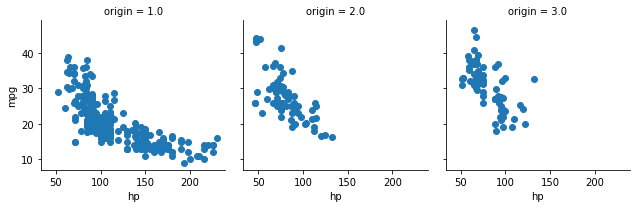

In [162]:
# Check dimension of Dataframe
print("Dimension:")
print(df.shape)
# ... we have 406 rows of data

# Look for false entries (empty, NaN, N/A, ?, ...)
print("\nFalse data:")
print(df.isnull().any())
# ...we see that there is false data in mpg and horsepower (hp)


# Remove false entries...
df = df[df['mpg'].notnull()]
df = df[df['hp'].notnull()]
# Check dimension of Dataframe
print("\nDimension after cleaning up:")
print(df.shape)
# ...this reduces our dataset to 392. Meaning 14 datarows were corrupt


# View some basic statistical details like percentile, mean, std etc. of a Dataframe
print("\nBasic statistical details:")
print(df.describe())
# ...describe result...
# ...we have model years from 1970 to 1982
# ...we have 3 origins for a car (Herkunft)
# ...we will continue by seperating these 3 origin types and also comparing them

# Interesting questions: hp vs. mpg? dependence of mpg and cylinders, weight etc.?

# Visualization
print("\nPlotting:")
#sns.factorplot(data=df, x="year", y="mpg", col="origin")
g = sns.FacetGrid(df, col="origin") 
g.map(plt.scatter, "hp", "mpg")

#### Teil 2: Verwenden Sie zwei verschiedene Vorhersageverfahren, um die PS-Zahl anhand eines gegebenen Datensatzes ohne PS-Zahl vorherzusagen.

In [3]:
# Linear Regression and Decision Trees

#### Teil 3: Nutzen Sie zwei Klassifikationsverfahren, um ein Fahrzeug bei sonstigen gegebenen Daten einer Zylinderzahl zuzuordnen

In [4]:
# KNN and Naive Bayes

#### Für Teile 2 und 3: Validieren und testen Sie Ihre Ergebnisse jeweils mit Evaluationsmethoden wie diese bei Data Science Projekten üblich sind. Stellen Sie jeweils die Ergebnisse Ihrer Verfahren vergleichend optisch dar und beschreiben Sie das jeweilige Endergebnis. Diskutieren Sie, für welche Lösung Sie sich entscheiden. Optimieren Sie in einer bis maximal drei Iteration(en) die gewählte Lösung. Kommentieren Sie ggfs., welche weiteren Möglichkeiten zur Verbesserung Sie noch anwenden könnten. Erstellen Sie eine Methode, mit der man die Daten, für die eine Vorhersage getroffen werden soll, manuell eingeben kann, und diese einem das Resultat liefert und auch optisch sinnvoll anzeigt.

In [5]:
# Accuracy, mean error, etc.